In [35]:
# Import pandas modules
import pandas as pd
import numpy as np
import json
import os
import datetime as dt
import time as time
from time import mktime
import matplotlib.pyplot as plt
import seaborn as cns 
    

In [36]:
# Isolate data items
# Date Range A: Normal Operating Period 22nd Dec 2017 - 25th Jan 2018
# Sampled 8 days of the 35 days total
# Time Block: 2pm - 8pm
# Carrier: Delta Airlines (DL)
# Airports: MCO, ATL

# Data Fields: airport code, date, carrier code, 
# Filter by scheduledGateDeparture, actualGateDeparture

# Need catch issue with departure date roll over where departure start time is less than departure end time
# Need to identify duplicate flights across adjacent days
# Example is Historic_Request_ATL_20190122_14.json flight 268



Date_Range_A_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['ATL']
Date_Range_A_Dates = ['20171222', '20171223', '20171224', '20171225','20180122', '20180123', '20180124', '20180125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_A_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_A_Dates:
        Date_Range_A_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_A_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_A_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]

            

Flight Counter: 1
Airline Flight#: DL656
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T10:55:00.000
Actual Departure: 2017-12-22T16:51:00.000
Flight Departure Delayed by (H:M:S): 5:56:00
Departure Time Delta (minutes): 356.0


Flight Counter: 2
Airline Flight#: DL1188
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T11:37:00.000
Actual Departure: 2017-12-22T13:52:00.000
Flight Departure Delayed by (H:M:S): 2:15:00
Departure Time Delta (minutes): 135.0


Flight Counter: 3
Airline Flight#: DL1586
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T13:30:00.000
Actual Departure: 2017-12-22T13:51:00.000
Flight Departure Delayed by (H:M:S): 0:21:00
Departure Time Delta (minutes): 21.0


Flight Counter: 4
Airline Flight#: DL1963
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T13:35:00.000
Actual Departure: 2017-12-22T14:04:00.000
Flight Departure Delayed by (H:M:S): 0:29:00
Departure Time Delta (minutes): 29.0


Flight Counter: 5
Airline F

Flight Counter: 57
Airline Flight#: DL1615
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T15:00:00.000
Actual Departure: 2017-12-22T15:29:00.000
Flight Departure Delayed by (H:M:S): 0:29:00
Departure Time Delta (minutes): 29.0


Flight Counter: 58
Airline Flight#: DL1999
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T15:00:00.000
Actual Departure: 2017-12-22T15:00:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 59
Airline Flight#: DL1584
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T15:00:00.000
Actual Departure: 2017-12-22T14:59:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 60
Airline Flight#: DL2033
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T15:01:00.000
Actual Departure: 2017-12-22T15:03:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 61
Airline Flight#: DL1804
Airport:

Flight Counter: 103
Airline Flight#: DL1378
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:03:00.000
Actual Departure: 2017-12-22T16:13:00.000
Flight Departure Delayed by (H:M:S): 0:10:00
Departure Time Delta (minutes): 10.0


Flight Counter: 104
Airline Flight#: DL1383
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:03:00.000
Actual Departure: 2017-12-22T15:59:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 105
Airline Flight#: DL1462
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:08:00.000
Actual Departure: 2017-12-22T16:07:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 106
Airline Flight#: DL476
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:20:00.000
Actual Departure: 2017-12-22T16:19:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 107
Airline Fl

Flight Counter: 150
Airline Flight#: DL795
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:10:00.000
Actual Departure: 2017-12-22T17:04:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 151
Airline Flight#: DL2430
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:13:00.000
Actual Departure: 2017-12-22T17:13:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 152
Airline Flight#: DL1293
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:15:00.000
Actual Departure: 2017-12-22T17:13:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 153
Airline Flight#: DL1124
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:15:00.000
Actual Departure: 2017-12-22T17:36:00.000
Flight Departure Delayed by (H:M:S): 0:21:00
Departure Time Delta (minutes): 21.0


Flight Counter: 154
Airline Flight#: DL1251
Airpor

Airline Flight#: DL369
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T18:02:00.000
Actual Departure: 2017-12-22T18:00:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 197
Airline Flight#: DL80
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T18:02:00.000
Actual Departure: 2017-12-22T18:06:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 198
Airline Flight#: DL784
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T18:03:00.000
Actual Departure: 2017-12-22T18:13:00.000
Flight Departure Delayed by (H:M:S): 0:10:00
Departure Time Delta (minutes): 10.0


Flight Counter: 199
Airline Flight#: DL64
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T18:06:00.000
Actual Departure: 2017-12-22T18:15:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 200
Airline Flight#: DL2216
Airport



Flight Counter: 261
Airline Flight#: DL2580
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:34:00.000
Actual Departure: 2017-12-22T19:32:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 262
Airline Flight#: DL2215
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:36:00.000
Actual Departure: 2017-12-22T20:23:00.000
Flight Departure Delayed by (H:M:S): 0:47:00
Departure Time Delta (minutes): 47.0


Flight Counter: 263
Airline Flight#: DL996
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:39:00.000
Actual Departure: 2017-12-22T19:39:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 264
Airline Flight#: DL752
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:40:00.000
Actual Departure: 2017-12-22T19:47:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 265
Airline Flight#: DL2100
Air

Date: 2017-12-23
Scheduled Departure: 2017-12-23T14:17:00.000
Actual Departure: 2017-12-23T14:52:00.000
Flight Departure Delayed by (H:M:S): 0:35:00
Departure Time Delta (minutes): 35.0


Flight Counter: 317
Airline Flight#: DL780
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T14:22:00.000
Actual Departure: 2017-12-23T14:20:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 318
Airline Flight#: DL1116
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T14:24:00.000
Actual Departure: 2017-12-23T14:41:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departure Time Delta (minutes): 17.0


Flight Counter: 319
Airline Flight#: DL2047
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T14:25:00.000
Actual Departure: 2017-12-23T14:39:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 320
Airline Flight#: DL1425
Airport: ATL
Date: 2017-12-23
Schedul

Flight Counter: 354
Airline Flight#: DL2016
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T15:10:00.000
Actual Departure: 2017-12-23T15:06:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 355
Airline Flight#: DL885
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T15:12:00.000
Actual Departure: 2017-12-23T15:12:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 356
Airline Flight#: DL2514
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T15:12:00.000
Actual Departure: 2017-12-23T15:10:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 357
Airline Flight#: DL2445
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T15:15:00.000
Actual Departure: 2017-12-23T15:17:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 358
Airline Flight#: DL2034
Airport

Flight Counter: 391
Airline Flight#: DL2281
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:26:00.000
Actual Departure: 2017-12-23T16:43:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departure Time Delta (minutes): 17.0


Flight Counter: 392
Airline Flight#: DL762
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:26:00.000
Actual Departure: 2017-12-23T17:06:00.000
Flight Departure Delayed by (H:M:S): 0:40:00
Departure Time Delta (minutes): 40.0


Flight Counter: 393
Airline Flight#: DL2381
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:27:00.000
Actual Departure: 2017-12-23T16:25:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 394
Airline Flight#: DL1227
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:27:00.000
Actual Departure: 2017-12-23T16:24:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 395
Airline

Flight Counter: 435
Airline Flight#: DL1226
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T17:32:00.000
Actual Departure: 2017-12-23T17:37:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 436
Airline Flight#: DL91
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T17:35:00.000
Actual Departure: 2017-12-23T17:35:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 437
Airline Flight#: DL1685
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T17:40:00.000
Actual Departure: 2017-12-23T18:26:00.000
Flight Departure Delayed by (H:M:S): 0:46:00
Departure Time Delta (minutes): 46.0


Flight Counter: 438
Airline Flight#: DL1834
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T17:40:00.000
Actual Departure: 2017-12-23T17:37:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 439
Airline Flight#: DL28
Airport

Flight Counter: 482
Airline Flight#: DL565
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T18:33:00.000
Actual Departure: 2017-12-23T18:29:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 483
Airline Flight#: DL1878
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T18:35:00.000
Actual Departure: 2017-12-23T18:45:00.000
Flight Departure Delayed by (H:M:S): 0:10:00
Departure Time Delta (minutes): 10.0


Flight Counter: 484
Airline Flight#: DL2652
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T18:35:00.000
Actual Departure: 2017-12-23T18:31:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 485
Airline Flight#: DL377
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T18:35:00.000
Actual Departure: 2017-12-23T19:37:00.000
Flight Departure Delayed by (H:M:S): 1:02:00
Departure Time Delta (minutes): 62.0


Flight Counter: 486
Airline 

Flight Counter: 524
Airline Flight#: DL1285
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:31:00.000
Actual Departure: 2017-12-23T19:25:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 525
Airline Flight#: DL2242
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:32:00.000
Actual Departure: 2017-12-23T19:32:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 526
Airline Flight#: DL1356
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:34:00.000
Actual Departure: 2017-12-23T19:35:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 527
Airline Flight#: DL2215
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:36:00.000
Actual Departure: 2017-12-23T19:51:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 528
Airline Flight#: DL2827
Air

Flight Counter: 572
Airline Flight#: DL1136
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T14:05:00.000
Actual Departure: 2017-12-24T14:05:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 573
Airline Flight#: DL2084
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T14:09:00.000
Actual Departure: 2017-12-24T14:02:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 574
Airline Flight#: DL1334
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T14:10:00.000
Actual Departure: 2017-12-24T14:04:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 575
Airline Flight#: DL1271
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T14:15:00.000
Actual Departure: 2017-12-24T14:13:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 576
Airline Flight#: DL2046
Airport:

Flight Counter: 617
Airline Flight#: DL2439
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T15:50:00.000
Actual Departure: 2017-12-24T15:46:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 618
Airline Flight#: DL1527
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T16:00:00.000
Actual Departure: 2017-12-24T16:11:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 619
Airline Flight#: DL313
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T16:00:00.000
Actual Departure: 2017-12-24T16:06:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 620
Airline Flight#: DL1383
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T16:03:00.000
Actual Departure: 2017-12-24T16:14:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 621
Airli

Flight Counter: 653
Airline Flight#: DL795
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T17:10:00.000
Actual Departure: 2017-12-24T17:10:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 654
Airline Flight#: DL1293
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T17:15:00.000
Actual Departure: 2017-12-24T17:12:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 655
Airline Flight#: DL1115
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T17:28:00.000
Actual Departure: 2017-12-24T17:44:00.000
Flight Departure Delayed by (H:M:S): 0:16:00
Departure Time Delta (minutes): 16.0


Flight Counter: 656
Airline Flight#: DL2281
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T17:30:00.000
Actual Departure: 2017-12-24T17:25:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 657
Airline Flight#: DL2642
Airpor

Flight Counter: 704
Airline Flight#: DL2215
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:05:00.000
Actual Departure: 2017-12-24T19:05:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 705
Airline Flight#: DL2331
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:05:00.000
Actual Departure: 2017-12-24T19:03:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 706
Airline Flight#: DL830
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:05:00.000
Actual Departure: 2017-12-24T19:02:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 707
Airline Flight#: DL1378
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:05:00.000
Actual Departure: 2017-12-24T19:03:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 708
Airline Flight#: DL1431
Airport: 

Flight Counter: 793
Airline Flight#: DL476
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T15:29:00.000
Actual Departure: 2017-12-25T15:25:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 794
Airline Flight#: DL2278
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T15:30:00.000
Actual Departure: 2017-12-25T15:27:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 795
Airline Flight#: DL1442
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T15:34:00.000
Actual Departure: 2017-12-25T15:31:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 796
Airline Flight#: DL82
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T15:40:00.000
Actual Departure: 2017-12-25T15:38:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 797
Airline Flight#

Flight Counter: 838
Airline Flight#: DL1685
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T17:31:00.000
Actual Departure: 2017-12-25T17:30:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 839
Airline Flight#: DL1834
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T17:32:00.000
Actual Departure: 2017-12-25T17:39:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 840
Airline Flight#: DL1226
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T17:32:00.000
Actual Departure: 2017-12-25T18:01:00.000
Flight Departure Delayed by (H:M:S): 0:29:00
Departure Time Delta (minutes): 29.0


Flight Counter: 841
Airline Flight#: DL28
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T17:41:00.000
Actual Departure: 2017-12-25T17:37:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 842
Airline F

Actual Departure: 2017-12-25T18:58:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 887
Airline Flight#: DL1299
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T19:00:00.000
Actual Departure: 2017-12-25T18:59:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 888
Airline Flight#: DL2210
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T19:01:00.000
Actual Departure: 2017-12-25T19:00:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 889
Airline Flight#: DL1555
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T19:03:00.000
Actual Departure: 2017-12-25T18:58:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 890
Airline Flight#: DL2023
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T19:05:00.000
Actual Departure: 2017-12-25T19:

Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 927
Airline Flight#: DL2472
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:40:00.000
Actual Departure: 2018-01-22T13:51:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 928
Airline Flight#: DL2046
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:45:00.000
Actual Departure: 2018-01-22T14:09:00.000
Flight Departure Delayed by (H:M:S): 0:24:00
Departure Time Delta (minutes): 24.0


Flight Counter: 929
Airline Flight#: DL1951
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:47:00.000
Actual Departure: 2018-01-22T14:05:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 930
Airline Flight#: DL1755
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:47:00.000
Actual Departure: 2018-01-22T13:56:00.000
Flight Departure Delayed by (H:M:S): 0:09:0

Flight Counter: 974
Airline Flight#: DL2413
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:50:00.000
Actual Departure: 2018-01-22T15:39:00.000
Flight Departure Delayed by (H:M:S): 0:49:00
Departure Time Delta (minutes): 49.0


Flight Counter: 975
Airline Flight#: DL370
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:55:00.000
Actual Departure: 2018-01-22T14:55:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 976
Airline Flight#: DL1168
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:55:00.000
Actual Departure: 2018-01-22T14:50:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 977
Airline Flight#: DL2109
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:55:00.000
Actual Departure: 2018-01-22T14:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 978
Airline Flight#: DL1416
Airpor

Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:59:00.000
Actual Departure: 2018-01-22T15:52:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1038
Airline Flight#: DL44
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:00:00.000
Actual Departure: 2018-01-22T16:02:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1039
Airline Flight#: DL1758
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:00:00.000
Actual Departure: 2018-01-22T16:08:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 1040
Airline Flight#: DL2630
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:00:00.000
Actual Departure: 2018-01-22T16:00:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1041
Airline Flight#: DL1527
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-

Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1093
Airline Flight#: DL706
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:02:00.000
Actual Departure: 2018-01-22T16:52:00.000
Flight Departed Early by (H:M:S): 0:10:00
Departure Time Delta (minutes): -10.0


Flight Counter: 1094
Airline Flight#: DL1971
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:02:00.000
Actual Departure: 2018-01-22T16:58:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1095
Airline Flight#: DL1380
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:03:00.000
Actual Departure: 2018-01-22T16:59:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1096
Airline Flight#: DL875
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:06:00.000
Actual Departure: 2018-01-22T17:04:00.000
Flight Departed Early by (H:M

Flight Counter: 1163
Airline Flight#: DL2150
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T18:55:00.000
Actual Departure: 2018-01-22T18:53:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1164
Airline Flight#: DL2502
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:00:00.000
Actual Departure: 2018-01-22T18:58:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1165
Airline Flight#: DL951
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:00:00.000
Actual Departure: 2018-01-22T18:57:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1166
Airline Flight#: DL2327
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:00:00.000
Actual Departure: 2018-01-22T19:00:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1167
Airline Flight#: DL1628
Airp

Delay (Minutes): 0
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1204
Airline Flight#: DL504
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:38:00.000
Actual Departure: 2018-01-22T19:39:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1205
Airline Flight#: DL1576
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:40:00.000
Actual Departure: 2018-01-22T20:10:00.000
Flight Departure Delayed by (H:M:S): 0:30:00
Departure Time Delta (minutes): 30.0


Flight Counter: 1206
Airline Flight#: DL675
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:40:00.000
Actual Departure: 2018-01-22T19:37:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1207
Airline Flight#: DL2078
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:41:00.000
Actual Departure: 2018-01-22T19:55:00.000
Flight Departure Delayed b

Flight Counter: 1271
Airline Flight#: DL2416
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:25:00.000
Actual Departure: 2018-01-23T14:20:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1272
Airline Flight#: DL1534
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:29:00.000
Actual Departure: 2018-01-23T14:26:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1273
Airline Flight#: DL2629
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:30:00.000
Actual Departure: 2018-01-23T15:31:00.000
Flight Departure Delayed by (H:M:S): 1:01:00
Departure Time Delta (minutes): 61.0


Flight Counter: 1274
Airline Flight#: DL2047
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:30:00.000
Actual Departure: 2018-01-23T14:25:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1275
Airl

Scheduled Departure: 2018-01-23T15:15:00.000
Actual Departure: 2018-01-23T15:12:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1315
Airline Flight#: DL2365
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:16:00.000
Actual Departure: 2018-01-23T15:10:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1316
Airline Flight#: DL885
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:17:00.000
Actual Departure: 2018-01-23T15:15:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1317
Airline Flight#: DL1983
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:17:00.000
Actual Departure: 2018-01-23T15:13:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1318
Airline Flight#: DL2599
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-

Flight Counter: 1363
Airline Flight#: DL1778
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:28:00.000
Actual Departure: 2018-01-23T16:27:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1364
Airline Flight#: DL1886
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:30:00.000
Actual Departure: 2018-01-23T17:48:00.000
Flight Departure Delayed by (H:M:S): 1:18:00
Departure Time Delta (minutes): 78.0


Flight Counter: 1365
Airline Flight#: DL1364
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:30:00.000
Actual Departure: 2018-01-23T16:25:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1366
Airline Flight#: DL2081
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:30:00.000
Actual Departure: 2018-01-23T16:28:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1367
Airl

Flight Counter: 1410
Airline Flight#: DL72
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:41:00.000
Actual Departure: 2018-01-23T17:38:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1411
Airline Flight#: DL1293
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:42:00.000
Actual Departure: 2018-01-23T17:39:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1412
Airline Flight#: DL117
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:42:00.000
Actual Departure: 2018-01-23T17:39:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1413
Airline Flight#: DL28
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:44:00.000
Actual Departure: 2018-01-23T17:39:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1414
Airline Flig

Flight Counter: 1489
Airline Flight#: DL2186
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:30:00.000
Actual Departure: 2018-01-23T20:29:00.000
Flight Departure Delayed by (H:M:S): 0:59:00
Departure Time Delta (minutes): 59.0


Flight Counter: 1490
Airline Flight#: DL1926
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:30:00.000
Actual Departure: 2018-01-23T19:23:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1491
Airline Flight#: DL2348
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:31:00.000
Actual Departure: 2018-01-23T19:27:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1492
Airline Flight#: DL1356
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:33:00.000
Actual Departure: 2018-01-23T19:30:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1493
Airl

Flight Counter: 1535
Airline Flight#: DL365
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T13:56:00.000
Actual Departure: 2018-01-24T13:52:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1536
Airline Flight#: DL976
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T13:58:00.000
Actual Departure: 2018-01-24T13:54:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1537
Airline Flight#: DL888
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T13:58:00.000
Actual Departure: 2018-01-24T14:00:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1538
Airline Flight#: DL1398
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T13:59:00.000
Actual Departure: 2018-01-24T13:55:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1539
Airline 

Flight Counter: 1582
Airline Flight#: DL1281
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:02:00.000
Actual Departure: 2018-01-24T15:00:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1583
Airline Flight#: DL765
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:03:00.000
Actual Departure: 2018-01-24T14:56:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1584
Airline Flight#: DL2033
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:03:00.000
Actual Departure: 2018-01-24T15:03:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1585
Airline Flight#: DL2567
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:04:00.000
Actual Departure: 2018-01-24T15:01:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1586
Airline Flight#: DL1093
Airp

Flight Counter: 1628
Airline Flight#: DL2223
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:59:00.000
Actual Departure: 2018-01-24T15:56:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1629
Airline Flight#: DL44
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:00:00.000
Actual Departure: 2018-01-24T16:05:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 1630
Airline Flight#: DL1758
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:00:00.000
Actual Departure: 2018-01-24T15:57:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1631
Airline Flight#: DL1527
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:00:00.000
Actual Departure: 2018-01-24T15:58:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1632
Airline

Flight Counter: 1665
Airline Flight#: DL1705
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:44:00.000
Actual Departure: 2018-01-24T16:41:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1666
Airline Flight#: DL1623
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:45:00.000
Actual Departure: 2018-01-24T16:39:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1667
Airline Flight#: DL1800
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:45:00.000
Actual Departure: 2018-01-24T16:43:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1668
Airline Flight#: DL1777
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:47:00.000
Actual Departure: 2018-01-24T16:44:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1669
Airline

Departure Time Delta (minutes): -3.0


Flight Counter: 1703
Airline Flight#: DL1293
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:42:00.000
Actual Departure: 2018-01-24T17:36:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1704
Airline Flight#: DL28
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:44:00.000
Actual Departure: 2018-01-24T17:41:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1705
Airline Flight#: DL2553
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:45:00.000
Actual Departure: 2018-01-24T17:41:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1706
Airline Flight#: DL2493
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:45:00.000
Actual Departure: 2018-01-24T17:42:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes)

Flight Counter: 1752
Airline Flight#: DL1849
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:03:00.000
Actual Departure: 2018-01-24T19:00:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1753
Airline Flight#: DL1805
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:05:00.000
Actual Departure: 2018-01-24T19:00:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1754
Airline Flight#: DL2112
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:05:00.000
Actual Departure: 2018-01-24T19:04:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1755
Airline Flight#: DL1940
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:05:00.000
Actual Departure: 2018-01-24T19:05:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1756
Airline Flight#: DL2016
Air

Flight Counter: 1807
Airline Flight#: DL2749
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:55:00.000
Actual Departure: 2018-01-24T19:53:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1808
Airline Flight#: DL1340
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:55:00.000
Actual Departure: 2018-01-24T19:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1809
Airline Flight#: DL2426
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:55:00.000
Actual Departure: 2018-01-24T19:57:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1810
Airline Flight#: DL2289
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:56:00.000
Actual Departure: 2018-01-24T19:56:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1811
Airline Flight#: DL1753
A

Flight Counter: 1863
Airline Flight#: DL2245
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:44:00.000
Actual Departure: 2018-01-25T14:42:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1864
Airline Flight#: DL2206
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:45:00.000
Actual Departure: 2018-01-25T14:47:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1865
Airline Flight#: DL2413
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:50:00.000
Actual Departure: 2018-01-25T14:52:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1866
Airline Flight#: DL1168
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:55:00.000
Actual Departure: 2018-01-25T14:51:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1867
Air

Flight Counter: 1923
Airline Flight#: DL932
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:44:00.000
Actual Departure: 2018-01-25T15:41:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1924
Airline Flight#: DL1270
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:48:00.000
Actual Departure: 2018-01-25T15:42:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1925
Airline Flight#: DL1462
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:52:00.000
Actual Departure: 2018-01-25T15:48:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1926
Airline Flight#: DL1105
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:53:00.000
Actual Departure: 2018-01-25T15:53:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1927
Airline Flight#: DL1110
Airp

Flight Counter: 1964
Airline Flight#: DL1909
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:38:00.000
Actual Departure: 2018-01-25T16:35:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1965
Airline Flight#: DL725
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:39:00.000
Actual Departure: 2018-01-25T16:37:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1966
Airline Flight#: DL2445
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:42:00.000
Actual Departure: 2018-01-25T16:46:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 1967
Airline Flight#: DL1705
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:44:00.000
Actual Departure: 2018-01-25T16:49:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 1968
Airl

Flight Counter: 2000
Airline Flight#: DL2784
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:30:00.000
Actual Departure: 2018-01-25T17:25:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 2001
Airline Flight#: DL91
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:38:00.000
Actual Departure: 2018-01-25T17:34:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 2002
Airline Flight#: DL2863
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:38:00.000
Actual Departure: 2018-01-25T17:42:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 2003
Airline Flight#: DL672
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:38:00.000
Actual Departure: 2018-01-25T17:34:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 2004
Airline 

Actual Departure: 2018-01-25T18:06:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 2036
Airline Flight#: DL2826
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:12:00.000
Actual Departure: 2018-01-25T18:52:00.000
Flight Departure Delayed by (H:M:S): 0:40:00
Departure Time Delta (minutes): 40.0


Flight Counter: 2037
Airline Flight#: DL116
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:12:00.000
Actual Departure: 2018-01-25T18:06:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 2038
Airline Flight#: DL200
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:14:00.000
Actual Departure: 2018-01-25T18:45:00.000
Flight Departure Delayed by (H:M:S): 0:31:00
Departure Time Delta (minutes): 31.0


Flight Counter: 2039
Airline Flight#: DL319
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:16:00.000
Actual Departure: 2018-01

Flight Counter: 2077
Airline Flight#: DL2408
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:18:00.000
Actual Departure: 2018-01-25T19:22:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 2078
Airline Flight#: DL2366
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:18:00.000
Actual Departure: 2018-01-25T19:14:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 2079
Airline Flight#: DL31
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:18:00.000
Actual Departure: 2018-01-25T19:15:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 2080
Airline Flight#: DL90
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:18:00.000
Actual Departure: 2018-01-25T19:13:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 2081
Airline F

Flight Counter: 2120
Airline Flight#: DL1753
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:57:00.000
Actual Departure: 2018-01-25T19:53:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 2121
Airline Flight#: DL2509
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:58:00.000
Actual Departure: 2018-01-25T19:58:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 2122
Airline Flight#: DL2331
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:59:00.000
Actual Departure: 2018-01-25T20:04:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 2123
Airline Flight#: DL2559
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T20:00:00.000
Actual Departure: 2018-01-25T20:27:00.000
Flight Departure Delayed by (H:M:S): 0:27:00
Departure Time Delta (minutes): 27.0


Flight Counter: 2124
Airline Flight#: DL880

In [37]:
# Summarize Date Range A
print(f"\nDeparture Summary for Date Range A\n")

Sum_Early = (Date_Range_A_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_A_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_A_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_A_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_A_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_A_Summary_table = pd.DataFrame(Date_Range_A_Summary_data)

Date_Range_A_Summary_table.head()

# Create a list to store the values to be used in the graph 

ListATLA = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListATLA))




Departure Summary for Date Range A

Total Departures Early: 1195
Total Departures On Time: 191
Total Departures Delayed: 743
Total Departures: 2129

3


In [38]:
# Describe Date Range A
Date_Range_A_df.describe()



,Delay
count,2129.000000
mean,6.604979
std,30.032695
min,-25.000000
25%,-3.000000
50%,-1.000000
75%,5.000000
max,759.000000


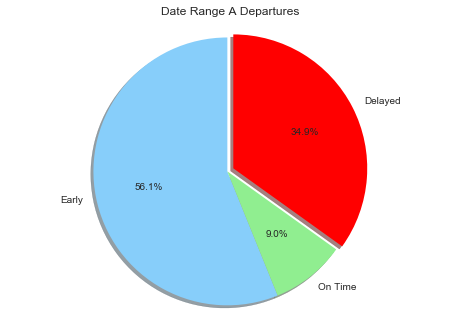

In [39]:
# Plot Date Range A Departures

Date_Range_A_Summary = [Sum_Early, Sum_On_Time, Sum_Delays]
Date_Range_A_Labels = ["Early", "On Time", "Delayed"]
colors = ["lightskyblue", "lightgreen", "red"]
explode = (0, 0, 0.05)

plt.title("Date Range A Departures")
plt.pie(Date_Range_A_Summary, autopct="%1.1f%%", explode=explode, labels=Date_Range_A_Labels, colors=colors, shadow=True, startangle=90)
plt.axis("equal")
plt.show()


In [40]:
# Compare total number of flights, average flights per day

# Plot average delay by hour in a random day during Date Range A
# Plot average delay by hour in a random day during Date Range B

In [41]:
# RANGE A MCO Full Period 


Date_Range_A_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['MCO']
Date_Range_A_Dates = ['20171222', '20171223', '20171224', '20171225','20180122', '20180123', '20180124', '20180125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_A_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_A_Dates:
        Date_Range_A_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_A_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_A_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]

Flight Counter: 1
Airline Flight#: DL2788
Airport: MCO
Date: 2017-12-22
Scheduled Departure: 2017-12-22T11:25:00.000
Actual Departure: 2017-12-22T14:55:00.000
Flight Departure Delayed by (H:M:S): 3:30:00
Departure Time Delta (minutes): 210.0


Flight Counter: 2
Airline Flight#: DL1424
Airport: MCO
Date: 2017-12-22
Scheduled Departure: 2017-12-22T14:02:00.000
Actual Departure: 2017-12-22T13:59:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 3
Airline Flight#: DL978
Airport: MCO
Date: 2017-12-22
Scheduled Departure: 2017-12-22T14:15:00.000
Actual Departure: 2017-12-22T14:11:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 4
Airline Flight#: DL1058
Airport: MCO
Date: 2017-12-22
Scheduled Departure: 2017-12-22T14:20:00.000
Actual Departure: 2017-12-22T14:23:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 5
Airline Flight#: 

Departure Time Delta (minutes): 26.0


Flight Counter: 69
Airline Flight#: DL803
Airport: MCO
Date: 2017-12-24
Scheduled Departure: 2017-12-24T17:00:00.000
Actual Departure: 2017-12-24T16:51:00.000
Flight Departed Early by (H:M:S): 0:09:00
Departure Time Delta (minutes): -9.0


Flight Counter: 70
Airline Flight#: DL2172
Airport: MCO
Date: 2017-12-24
Scheduled Departure: 2017-12-24T17:25:00.000
Actual Departure: 2017-12-24T17:23:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 71
Airline Flight#: DL869
Airport: MCO
Date: 2017-12-24
Scheduled Departure: 2017-12-24T17:50:00.000
Actual Departure: 2017-12-24T17:41:00.000
Flight Departed Early by (H:M:S): 0:09:00
Departure Time Delta (minutes): -9.0


Flight Counter: 72
Airline Flight#: DL2601
Airport: MCO
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:55:00.000
Actual Departure: 2017-12-24T19:39:00.000
Flight Departed Early by (H:M:S): 0:16:00
Departure Time Delta (minutes): -16.0




Flight Counter: 124
Airline Flight#: DL1051
Airport: MCO
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:30:00.000
Actual Departure: 2018-01-23T16:28:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 125
Airline Flight#: DL2624
Airport: MCO
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:38:00.000
Actual Departure: 2018-01-23T16:38:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 126
Airline Flight#: DL1652
Airport: MCO
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:40:00.000
Actual Departure: 2018-01-23T17:18:00.000
Flight Departure Delayed by (H:M:S): 0:38:00
Departure Time Delta (minutes): 38.0


Flight Counter: 127
Airline Flight#: DL2109
Airport: MCO
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:30:00.000
Actual Departure: 2018-01-23T17:25:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 128
Airline Flight#: DL1110
Air

In [42]:
# Summarize Date Range A
print(f"\nDeparture Summary for Date Range A\n")

Sum_Early = (Date_Range_A_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_A_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_A_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_A_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_A_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_A_Summary_table = pd.DataFrame(Date_Range_A_Summary_data)

Date_Range_A_Summary_table.head()


# Create a list to store the values to be used in the graph 

ListMCOA = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListMCOA))





Departure Summary for Date Range A

Total Departures Early: 96
Total Departures On Time: 14
Total Departures Delayed: 68
Total Departures: 178

3


In [43]:
# RANGE B Full Period - ATL 

Date_Range_B_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['ATL']
Date_Range_B_Dates = ['20181222', '20181223', '20181224', '20181225','20190122', '20190123', '20190124', '20190125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_B_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_B_Dates:
        Date_Range_B_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_B_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_B_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]

Flight Counter: 1
Airline Flight#: DL365
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T12:20:00.000
Actual Departure: 2018-12-22T16:37:00.000
Flight Departure Delayed by (H:M:S): 4:17:00
Departure Time Delta (minutes): 257.0


Flight Counter: 2
Airline Flight#: DL897
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T12:55:00.000
Actual Departure: 2018-12-22T12:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 3
Airline Flight#: DL1701
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T13:40:00.000
Actual Departure: 2018-12-22T13:53:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 4
Airline Flight#: DL1586
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T13:45:00.000
Actual Departure: 2018-12-22T14:42:00.000
Flight Departure Delayed by (H:M:S): 0:57:00
Departure Time Delta (minutes): 57.0


Flight Counter: 5
Airline Flight

Flight Counter: 56
Airline Flight#: DL2398
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T15:02:00.000
Actual Departure: 2018-12-22T15:02:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 57
Airline Flight#: DL1432
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T15:03:00.000
Actual Departure: 2018-12-22T15:06:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 58
Airline Flight#: DL1661
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T15:03:00.000
Actual Departure: 2018-12-22T15:01:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 59
Airline Flight#: DL2046
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T15:04:00.000
Actual Departure: 2018-12-22T15:02:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 60
Airline Flight#: DL1363
Airport: AT

Scheduled Departure: 2018-12-22T16:22:00.000
Actual Departure: 2018-12-22T16:22:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 111
Airline Flight#: DL2187
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T16:22:00.000
Actual Departure: 2018-12-22T16:23:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 112
Airline Flight#: DL970
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T16:23:00.000
Actual Departure: 2018-12-22T16:18:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 113
Airline Flight#: DL2774
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T16:24:00.000
Actual Departure: 2018-12-22T16:25:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 114
Airline Flight#: DL1176
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T16:24:00.000
Actu

Flight Counter: 164
Airline Flight#: DL14
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T17:50:00.000
Actual Departure: 2018-12-22T18:11:00.000
Flight Departure Delayed by (H:M:S): 0:21:00
Departure Time Delta (minutes): 21.0


Flight Counter: 165
Airline Flight#: DL337
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T17:52:00.000
Actual Departure: 2018-12-22T18:22:00.000
Flight Departure Delayed by (H:M:S): 0:30:00
Departure Time Delta (minutes): 30.0


Flight Counter: 166
Airline Flight#: DL2638
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T17:54:00.000
Actual Departure: 2018-12-22T17:52:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 167
Airline Flight#: DL2553
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T17:54:00.000
Actual Departure: 2018-12-22T18:20:00.000
Flight Departure Delayed by (H:M:S): 0:26:00
Departure Time Delta (minutes): 26.0


Flight Counter: 168
Airlin

Flight Counter: 204
Airline Flight#: DL2394
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T18:32:00.000
Actual Departure: 2018-12-22T18:27:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 205
Airline Flight#: DL313
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T18:33:00.000
Actual Departure: 2018-12-22T18:38:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 206
Airline Flight#: DL1636
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T18:38:00.000
Actual Departure: 2018-12-22T18:38:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 207
Airline Flight#: DL1385
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T18:46:00.000
Actual Departure: 2018-12-22T20:05:00.000
Flight Departure Delayed by (H:M:S): 1:19:00
Departure Time Delta (minutes): 79.0


Flight Counter: 208
Airline Flight#: DL909
Airpo

Flight Counter: 241
Airline Flight#: DL1753
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T19:30:00.000
Actual Departure: 2018-12-22T20:42:00.000
Flight Departure Delayed by (H:M:S): 1:12:00
Departure Time Delta (minutes): 72.0


Flight Counter: 242
Airline Flight#: DL1926
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T19:31:00.000
Actual Departure: 2018-12-22T19:33:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 243
Airline Flight#: DL2081
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T19:31:00.000
Actual Departure: 2018-12-22T19:29:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 244
Airline Flight#: DL2752
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T19:34:00.000
Actual Departure: 2018-12-22T19:49:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 245
Airl

Flight Counter: 295
Airline Flight#: DL1571
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T14:22:00.000
Actual Departure: 2018-12-23T14:19:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 296
Airline Flight#: DL1116
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T14:24:00.000
Actual Departure: 2018-12-23T14:20:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 297
Airline Flight#: DL385
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T14:26:00.000
Actual Departure: 2018-12-23T14:33:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 298
Airline Flight#: DL2357
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T14:26:00.000
Actual Departure: 2018-12-23T14:23:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 299
Airline Fli

Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:05:00.000
Actual Departure: 2018-12-23T15:05:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 333
Airline Flight#: DL1615
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:05:00.000
Actual Departure: 2018-12-23T17:15:00.000
Flight Departure Delayed by (H:M:S): 2:10:00
Departure Time Delta (minutes): 130.0


Flight Counter: 334
Airline Flight#: DL2184
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:06:00.000
Actual Departure: 2018-12-23T15:15:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 335
Airline Flight#: DL1983
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:06:00.000
Actual Departure: 2018-12-23T15:06:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 336
Airline Flight#: DL1534
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:0

Flight Counter: 371
Airline Flight#: DL2641
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T16:05:00.000
Actual Departure: 2018-12-23T16:06:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 372
Airline Flight#: DL1462
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T16:06:00.000
Actual Departure: 2018-12-23T17:34:00.000
Flight Departure Delayed by (H:M:S): 1:28:00
Departure Time Delta (minutes): 88.0


Flight Counter: 373
Airline Flight#: DL1053
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T16:07:00.000
Actual Departure: 2018-12-23T16:05:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 374
Airline Flight#: DL82
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T16:08:00.000
Actual Departure: 2018-12-23T16:03:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 375
Airline F

Flight Counter: 442
Airline Flight#: DL1076
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:54:00.000
Actual Departure: 2018-12-23T17:56:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 443
Airline Flight#: DL2553
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:54:00.000
Actual Departure: 2018-12-23T17:50:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 444
Airline Flight#: DL673
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:55:00.000
Actual Departure: 2018-12-23T18:23:00.000
Flight Departure Delayed by (H:M:S): 0:28:00
Departure Time Delta (minutes): 28.0


Flight Counter: 445
Airline Flight#: DL195
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:55:00.000
Actual Departure: 2018-12-23T17:54:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 446
Airline F

Actual Departure: 2018-12-23T19:12:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 499
Airline Flight#: DL954
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T19:17:00.000
Actual Departure: 2018-12-23T19:14:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 500
Airline Flight#: DL90
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T19:18:00.000
Actual Departure: 2018-12-23T19:14:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 501
Airline Flight#: DL659
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T19:19:00.000
Actual Departure: 2018-12-23T19:16:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 502
Airline Flight#: DL2023
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T19:20:00.000
Actual Departure: 2018-12-23T19:17:0

Flight Counter: 540
Airline Flight#: DL1213
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T19:57:00.000
Actual Departure: 2018-12-23T19:56:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 541
Airline Flight#: DL2700
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T19:57:00.000
Actual Departure: 2018-12-23T19:56:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 542
Airline Flight#: DL1482
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T19:59:00.000
Actual Departure: 2018-12-23T19:59:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 543
Airline Flight#: DL1775
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T19:59:00.000
Actual Departure: 2018-12-23T19:54:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 544
Airline Flight#: DL2459
Airport:

Actual Departure: 2018-12-24T15:40:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 610
Airline Flight#: DL1814
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T15:50:00.000
Actual Departure: 2018-12-24T15:47:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 611
Airline Flight#: DL1264
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T15:50:00.000
Actual Departure: 2018-12-24T15:47:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 612
Airline Flight#: DL1383
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T15:59:00.000
Actual Departure: 2018-12-24T15:56:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 613
Airline Flight#: DL2070
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T15:59:00.000
Actual Departure: 2018-12-24T15:

Flight Counter: 650
Airline Flight#: DL2334
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T17:06:00.000
Actual Departure: 2018-12-24T17:05:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 651
Airline Flight#: DL383
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T17:09:00.000
Actual Departure: 2018-12-24T17:45:00.000
Flight Departure Delayed by (H:M:S): 0:36:00
Departure Time Delta (minutes): 36.0


Flight Counter: 652
Airline Flight#: DL744
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T17:09:00.000
Actual Departure: 2018-12-24T17:06:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 653
Airline Flight#: DL1293
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T17:20:00.000
Actual Departure: 2018-12-24T17:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 654
Airline Fli

Flight Counter: 692
Airline Flight#: DL355
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T18:54:00.000
Actual Departure: 2018-12-24T18:50:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 693
Airline Flight#: DL2131
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T18:55:00.000
Actual Departure: 2018-12-24T19:10:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 694
Airline Flight#: DL1476
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T19:00:00.000
Actual Departure: 2018-12-24T18:53:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 695
Airline Flight#: DL830
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T19:03:00.000
Actual Departure: 2018-12-24T19:03:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 696
Airline Flight#: DL1454
Airport

Flight Counter: 734
Airline Flight#: DL340
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T13:55:00.000
Actual Departure: 2018-12-25T13:54:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 735
Airline Flight#: DL2329
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T13:56:00.000
Actual Departure: 2018-12-25T13:56:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 736
Airline Flight#: DL1613
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T13:56:00.000
Actual Departure: 2018-12-25T13:54:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 737
Airline Flight#: DL1136
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T13:57:00.000
Actual Departure: 2018-12-25T13:51:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 738
Airline Flight#: DL869
Airport: A

Flight Counter: 776
Airline Flight#: DL1167
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T15:11:00.000
Actual Departure: 2018-12-25T15:04:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 777
Airline Flight#: DL2445
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T15:12:00.000
Actual Departure: 2018-12-25T15:11:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 778
Airline Flight#: DL1692
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T15:12:00.000
Actual Departure: 2018-12-25T15:05:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 779
Airline Flight#: DL2891
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T15:18:00.000
Actual Departure: 2018-12-25T15:19:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 780
Airline Fl

Flight Counter: 829
Airline Flight#: DL1880
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T17:02:00.000
Actual Departure: 2018-12-25T17:02:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 830
Airline Flight#: DL2334
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T17:06:00.000
Actual Departure: 2018-12-25T17:05:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 831
Airline Flight#: DL383
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T17:09:00.000
Actual Departure: 2018-12-25T17:25:00.000
Flight Departure Delayed by (H:M:S): 0:16:00
Departure Time Delta (minutes): 16.0


Flight Counter: 832
Airline Flight#: DL1293
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T17:20:00.000
Actual Departure: 2018-12-25T17:18:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 833
Airline Flight#: DL91
Airport:

Flight Counter: 874
Airline Flight#: DL874
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T18:14:00.000
Actual Departure: 2018-12-25T18:10:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 875
Airline Flight#: DL319
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T18:23:00.000
Actual Departure: 2018-12-25T18:21:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 876
Airline Flight#: DL200
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T18:25:00.000
Actual Departure: 2018-12-25T18:56:00.000
Flight Departure Delayed by (H:M:S): 0:31:00
Departure Time Delta (minutes): 31.0


Flight Counter: 877
Airline Flight#: DL2069
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T18:27:00.000
Actual Departure: 2018-12-25T18:27:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 878
Airline Flight#: DL1878
Airport:

Flight Counter: 913
Airline Flight#: DL2776
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T19:37:00.000
Actual Departure: 2018-12-25T19:35:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 914
Airline Flight#: DL1446
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T19:38:00.000
Actual Departure: 2018-12-25T19:38:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 915
Airline Flight#: DL105
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T19:43:00.000
Actual Departure: 2018-12-25T19:38:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 916
Airline Flight#: DL2123
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T19:50:00.000
Actual Departure: 2018-12-25T19:57:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 917
Airline Flight#: DL1325
Airport

Flight Counter: 954
Airline Flight#: DL1673
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:12:00.000
Actual Departure: 2019-01-22T14:10:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 955
Airline Flight#: DL807
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:14:00.000
Actual Departure: 2019-01-22T14:13:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 956
Airline Flight#: DL1766
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:15:00.000
Actual Departure: 2019-01-22T15:49:00.000
Flight Departure Delayed by (H:M:S): 1:34:00
Departure Time Delta (minutes): 94.0


Flight Counter: 957
Airline Flight#: DL2313
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:17:00.000
Actual Departure: 2019-01-22T14:13:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 958
Airline Fl

Departure Time Delta (minutes): 0


Flight Counter: 998
Airline Flight#: DL2318
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:06:00.000
Actual Departure: 2019-01-22T15:04:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 999
Airline Flight#: DL1309
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:06:00.000
Actual Departure: 2019-01-22T15:07:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1000
Airline Flight#: DL1670
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:07:00.000
Actual Departure: 2019-01-22T15:06:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1001
Airline Flight#: DL2375
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:07:00.000
Actual Departure: 2019-01-22T15:03:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes):

Flight Counter: 1051
Airline Flight#: DL480
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:21:00.000
Actual Departure: 2019-01-22T16:18:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1052
Airline Flight#: DL970
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:22:00.000
Actual Departure: 2019-01-22T16:27:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 1053
Airline Flight#: DL1346
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:22:00.000
Actual Departure: 2019-01-22T16:42:00.000
Flight Departure Delayed by (H:M:S): 0:20:00
Departure Time Delta (minutes): 20.0


Flight Counter: 1054
Airline Flight#: DL887
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:23:00.000
Actual Departure: 2019-01-22T16:31:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 1055
Air

Flight Counter: 1095
Airline Flight#: DL2237
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:21:00.000
Actual Departure: 2019-01-22T17:14:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1096
Airline Flight#: DL947
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:22:00.000
Actual Departure: 2019-01-22T17:30:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 1097
Airline Flight#: DL2973
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:25:00.000
Actual Departure: 2019-01-22T17:47:00.000
Flight Departure Delayed by (H:M:S): 0:22:00
Departure Time Delta (minutes): 22.0


Flight Counter: 1098
Airline Flight#: DL296
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:25:00.000
Actual Departure: 2019-01-22T17:25:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1099
Airline Flight#: DL946
A

Flight Counter: 1143
Airline Flight#: DL72
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:15:00.000
Actual Departure: 2019-01-22T18:09:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1144
Airline Flight#: DL909
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:17:00.000
Actual Departure: 2019-01-22T18:13:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1145
Airline Flight#: DL881
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:18:00.000
Actual Departure: 2019-01-22T18:12:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1146
Airline Flight#: DL753
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:20:00.000
Actual Departure: 2019-01-22T18:25:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 1147
Airline Fl

Flight Counter: 1187
Airline Flight#: DL2445
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:29:00.000
Actual Departure: 2019-01-22T19:36:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 1188
Airline Flight#: DL1918
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:30:00.000
Actual Departure: 2019-01-22T19:39:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 1189
Airline Flight#: DL2966
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:30:00.000
Actual Departure: 2019-01-22T19:27:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1190
Airline Flight#: DL1259
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:31:00.000
Actual Departure: 2019-01-22T19:39:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 1191
A

Flight Counter: 1254
Airline Flight#: DL1735
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:22:00.000
Actual Departure: 2019-01-23T14:32:00.000
Flight Departure Delayed by (H:M:S): 0:10:00
Departure Time Delta (minutes): 10.0


Flight Counter: 1255
Airline Flight#: DL1518
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:25:00.000
Actual Departure: 2019-01-23T14:25:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1256
Airline Flight#: DL1091
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:25:00.000
Actual Departure: 2019-01-23T14:23:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1257
Airline Flight#: DL1317
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:26:00.000
Actual Departure: 2019-01-23T14:20:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1258
Airline Flight#: DL2389


Flight Counter: 1290
Airline Flight#: DL1309
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:06:00.000
Actual Departure: 2019-01-23T15:02:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1291
Airline Flight#: DL2617
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:06:00.000
Actual Departure: 2019-01-23T15:04:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1292
Airline Flight#: DL2318
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:06:00.000
Actual Departure: 2019-01-23T15:06:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1293
Airline Flight#: DL2375
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:07:00.000
Actual Departure: 2019-01-23T15:01:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1294
Airline Flight#: DL1350
Air

Flight Departure Delayed by (H:M:S): 0:41:00
Departure Time Delta (minutes): 41.0


Flight Counter: 1341
Airline Flight#: DL827
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:13:00.000
Actual Departure: 2019-01-23T16:11:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1342
Airline Flight#: DL2055
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:20:00.000
Actual Departure: 2019-01-23T16:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1343
Airline Flight#: DL1412
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:21:00.000
Actual Departure: 2019-01-23T16:21:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1344
Airline Flight#: DL480
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:21:00.000
Actual Departure: 2019-01-23T16:20:00.000
Flight Departed Early by (H:M:S): 0:01:00
Depar

Flight Counter: 1375
Airline Flight#: DL2170
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:47:00.000
Actual Departure: 2019-01-23T17:00:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 1376
Airline Flight#: DL1738
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:48:00.000
Actual Departure: 2019-01-23T17:20:00.000
Flight Departure Delayed by (H:M:S): 0:32:00
Departure Time Delta (minutes): 32.0


Flight Counter: 1377
Airline Flight#: DL1898
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:49:00.000
Actual Departure: 2019-01-23T16:53:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 1378
Airline Flight#: DL2155
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:53:00.000
Actual Departure: 2019-01-23T17:56:00.000
Flight Departure Delayed by (H:M:S): 1:03:00
Departure Time Delta (minutes): 63.0


Flight Counter: 1

Flight Counter: 1435
Airline Flight#: DL31
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:09:00.000
Actual Departure: 2019-01-23T18:27:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 1436
Airline Flight#: DL319
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:15:00.000
Actual Departure: 2019-01-23T18:11:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1437
Airline Flight#: DL72
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:15:00.000
Actual Departure: 2019-01-23T18:15:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1438
Airline Flight#: DL909
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:17:00.000
Actual Departure: 2019-01-23T18:14:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1439
Airline Flight#: DL881
Airport

Flight Counter: 1471
Airline Flight#: DL2874
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:11:00.000
Actual Departure: 2019-01-23T19:11:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1472
Airline Flight#: DL1974
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:15:00.000
Actual Departure: 2019-01-23T19:16:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1473
Airline Flight#: DL1323
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:15:00.000
Actual Departure: 2019-01-23T19:59:00.000
Flight Departure Delayed by (H:M:S): 0:44:00
Departure Time Delta (minutes): 44.0


Flight Counter: 1474
Airline Flight#: DL316
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:19:00.000
Actual Departure: 2019-01-23T19:17:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1475
Airline Flight#: DL1483

Flight Counter: 1512
Airline Flight#: DL1736
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T20:00:00.000
Actual Departure: 2019-01-23T22:17:00.000
Flight Departure Delayed by (H:M:S): 2:17:00
Departure Time Delta (minutes): 137.0


Flight Counter: 1513
Airline Flight#: DL2914
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T11:30:00.000
Actual Departure: 2019-01-24T14:28:00.000
Flight Departure Delayed by (H:M:S): 2:58:00
Departure Time Delta (minutes): 178.0


Flight Counter: 1514
Airline Flight#: DL2486
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T12:05:00.000
Actual Departure: 2019-01-24T14:35:00.000
Flight Departure Delayed by (H:M:S): 2:30:00
Departure Time Delta (minutes): 150.0


Flight Counter: 1515
Airline Flight#: DL425
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T12:10:00.000
Actual Departure: 2019-01-24T13:44:00.000
Flight Departure Delayed by (H:M:S): 1:34:00
Departure Time Delta (minutes): 94.0


Flight Counter

Flight Counter: 1550
Airline Flight#: DL2026
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:10:00.000
Actual Departure: 2019-01-24T14:09:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1551
Airline Flight#: DL1681
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:10:00.000
Actual Departure: 2019-01-24T14:22:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 1552
Airline Flight#: DL1673
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:12:00.000
Actual Departure: 2019-01-24T14:10:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1553
Airline Flight#: DL807
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:14:00.000
Actual Departure: 2019-01-24T14:18:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 1554
Air

Flight Counter: 1595
Airline Flight#: DL2318
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:06:00.000
Actual Departure: 2019-01-24T15:06:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1596
Airline Flight#: DL2617
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:06:00.000
Actual Departure: 2019-01-24T15:04:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1597
Airline Flight#: DL2375
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:07:00.000
Actual Departure: 2019-01-24T15:34:00.000
Flight Departure Delayed by (H:M:S): 0:27:00
Departure Time Delta (minutes): 27.0


Flight Counter: 1598
Airline Flight#: DL1670
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:07:00.000
Actual Departure: 2019-01-24T15:57:00.000
Flight Departure Delayed by (H:M:S): 0:50:00
Departure Time Delta (minutes): 50.0


Flight Counter: 1599
Airline Flight#: DL13

Flight Counter: 1638
Airline Flight#: DL1502
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:59:00.000
Actual Departure: 2019-01-24T15:58:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1639
Airline Flight#: DL1606
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:59:00.000
Actual Departure: 2019-01-24T15:55:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1640
Airline Flight#: DL2413
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:00:00.000
Actual Departure: 2019-01-24T18:31:00.000
Flight Departure Delayed by (H:M:S): 2:31:00
Departure Time Delta (minutes): 151.0


Flight Counter: 1641
Airline Flight#: DL2417
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:03:00.000
Actual Departure: 2019-01-24T16:31:00.000
Flight Departure Delayed by (H:M:S): 0:28:00
Departure Time Delta (minutes): 28.0


Flight Counter: 1642


Flight Counter: 1680
Airline Flight#: DL2170
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:47:00.000
Actual Departure: 2019-01-24T17:06:00.000
Flight Departure Delayed by (H:M:S): 0:19:00
Departure Time Delta (minutes): 19.0


Flight Counter: 1681
Airline Flight#: DL1738
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:48:00.000
Actual Departure: 2019-01-24T16:45:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1682
Airline Flight#: DL1898
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:49:00.000
Actual Departure: 2019-01-24T17:21:00.000
Flight Departure Delayed by (H:M:S): 0:32:00
Departure Time Delta (minutes): 32.0


Flight Counter: 1683
Airline Flight#: DL2155
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:53:00.000
Actual Departure: 2019-01-24T18:33:00.000
Flight Departure Delayed by (H:M:S): 1:40:00
Departure Time Delta (minutes): 100.0


Flight Counter: 16



Flight Counter: 1719
Airline Flight#: DL151
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:51:00.000
Actual Departure: 2019-01-24T17:46:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1720
Airline Flight#: DL2176
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:51:00.000
Actual Departure: 2019-01-24T17:50:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1721
Airline Flight#: DL2012
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:52:00.000
Actual Departure: 2019-01-24T17:49:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1722
Airline Flight#: DL2795
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:52:00.000
Actual Departure: 2019-01-24T17:52:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1723
Airline Flight#: DL195
Air

Airline Flight#: DL2282
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:45:00.000
Actual Departure: 2019-01-24T19:23:00.000
Flight Departure Delayed by (H:M:S): 0:38:00
Departure Time Delta (minutes): 38.0


Flight Counter: 1765
Airline Flight#: DL1497
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:46:00.000
Actual Departure: 2019-01-24T18:49:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 1766
Airline Flight#: DL2008
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:48:00.000
Actual Departure: 2019-01-24T19:03:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 1767
Airline Flight#: DL1190
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:49:00.000
Actual Departure: 2019-01-24T18:47:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1768
Airline Flight#: DL1

Flight Counter: 1810
Airline Flight#: DL2799
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:44:00.000
Actual Departure: 2019-01-24T19:50:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1811
Airline Flight#: DL1434
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:50:00.000
Actual Departure: 2019-01-24T19:49:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1812
Airline Flight#: DL2346
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:51:00.000
Actual Departure: 2019-01-24T20:03:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 1813
Airline Flight#: DL2611
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:51:00.000
Actual Departure: 2019-01-24T19:46:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1814
Ai

Flight Counter: 1856
Airline Flight#: DL2026
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:10:00.000
Actual Departure: 2019-01-25T14:07:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1857
Airline Flight#: DL1681
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:10:00.000
Actual Departure: 2019-01-25T14:24:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 1858
Airline Flight#: DL1673
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:12:00.000
Actual Departure: 2019-01-25T14:10:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1859
Airline Flight#: DL807
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:14:00.000
Actual Departure: 2019-01-25T14:13:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1860
Airli

Flight Counter: 1923
Airline Flight#: DL926
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:23:00.000
Actual Departure: 2019-01-25T15:36:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 1924
Airline Flight#: DL1276
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:24:00.000
Actual Departure: 2019-01-25T15:39:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 1925
Airline Flight#: DL2139
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:25:00.000
Actual Departure: 2019-01-25T15:31:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1926
Airline Flight#: DL2149
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:25:00.000
Actual Departure: 2019-01-25T15:42:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departure Time Delta (minutes): 17.0


Flight Counter: 19

Flight Counter: 1969
Airline Flight#: DL1865
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:32:00.000
Actual Departure: 2019-01-25T16:30:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1970
Airline Flight#: DL1575
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:32:00.000
Actual Departure: 2019-01-25T16:29:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1971
Airline Flight#: DL920
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:33:00.000
Actual Departure: 2019-01-25T16:56:00.000
Flight Departure Delayed by (H:M:S): 0:23:00
Departure Time Delta (minutes): 23.0


Flight Counter: 1972
Airline Flight#: DL2971
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:33:00.000
Actual Departure: 2019-01-25T16:31:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1973
Airli

Flight Counter: 2013
Airline Flight#: DL9950
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:35:00.000
Actual Departure: 2019-01-25T17:40:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 2014
Airline Flight#: DL1433
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:36:00.000
Actual Departure: 2019-01-25T17:40:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 2015
Airline Flight#: DL1522
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:38:00.000
Actual Departure: 2019-01-25T17:33:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 2016
Airline Flight#: DL819
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:39:00.000
Actual Departure: 2019-01-25T17:36:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 2017
Airl

Flight Departure Delayed by (H:M:S): 0:26:00
Departure Time Delta (minutes): 26.0


Flight Counter: 2052
Airline Flight#: DL116
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:13:00.000
Actual Departure: 2019-01-25T18:11:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 2053
Airline Flight#: DL319
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:15:00.000
Actual Departure: 2019-01-25T18:15:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 2054
Airline Flight#: DL72
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:15:00.000
Actual Departure: 2019-01-25T18:43:00.000
Flight Departure Delayed by (H:M:S): 0:28:00
Departure Time Delta (minutes): 28.0


Flight Counter: 2055
Airline Flight#: DL909
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:17:00.000
Actual Departure: 2019-01-25T18:15:00.000
Flight Departed Early by (H:M:S): 0:02:00
Depar

Flight Counter: 2091
Airline Flight#: DL316
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:19:00.000
Actual Departure: 2019-01-25T19:15:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 2092
Airline Flight#: DL90
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:20:00.000
Actual Departure: 2019-01-25T19:19:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 2093
Airline Flight#: DL1483
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:23:00.000
Actual Departure: 2019-01-25T19:23:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 2094
Airline Flight#: DL1742
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:24:00.000
Actual Departure: 2019-01-25T19:24:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 2095
Airline Flight#: DL2980
Airport: ATL
Date: 2019-01

In [44]:
# Summarize Date Range B
print(f"\nDeparture Summary for Date Range B\n")

Sum_Early = (Date_Range_B_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_B_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_B_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_B_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_B_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_B_Summary_table = pd.DataFrame(Date_Range_B_Summary_data)

Date_Range_B_Summary_table.head()
 
# Create a list to store the values to be used in the graph 
    
ListATLB = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListATLB))


Departure Summary for Date Range B

Total Departures Early: 1023
Total Departures On Time: 214
Total Departures Delayed: 895
Total Departures: 2132

3


In [45]:
# RANGE B Full Period - MCO

Date_Range_B_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['MCO']
Date_Range_B_Dates = ['20181222', '20181223', '20181224', '20181225','20190122', '20190123', '20190124', '20190125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_B_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_B_Dates:
        Date_Range_B_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_B_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_B_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]

Flight Counter: 1
Airline Flight#: DL1358
Airport: MCO
Date: 2018-12-22
Scheduled Departure: 2018-12-22T12:25:00.000
Actual Departure: 2018-12-22T13:47:00.000
Flight Departure Delayed by (H:M:S): 1:22:00
Departure Time Delta (minutes): 82.0


Flight Counter: 2
Airline Flight#: DL2312
Airport: MCO
Date: 2018-12-22
Scheduled Departure: 2018-12-22T13:25:00.000
Actual Departure: 2018-12-22T14:27:00.000
Flight Departure Delayed by (H:M:S): 1:02:00
Departure Time Delta (minutes): 62.0


Flight Counter: 3
Airline Flight#: DL1374
Airport: MCO
Date: 2018-12-22
Scheduled Departure: 2018-12-22T14:25:00.000
Actual Departure: 2018-12-22T14:18:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 4
Airline Flight#: DL1058
Airport: MCO
Date: 2018-12-22
Scheduled Departure: 2018-12-22T14:25:00.000
Actual Departure: 2018-12-22T15:02:00.000
Flight Departure Delayed by (H:M:S): 0:37:00
Departure Time Delta (minutes): 37.0


Flight Counter: 5
Airline Fligh

Flight Counter: 54
Airline Flight#: DL1928
Airport: MCO
Date: 2018-12-24
Scheduled Departure: 2018-12-24T14:32:00.000
Actual Departure: 2018-12-24T14:30:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 55
Airline Flight#: DL545
Airport: MCO
Date: 2018-12-24
Scheduled Departure: 2018-12-24T14:45:00.000
Actual Departure: 2018-12-24T14:41:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 56
Airline Flight#: DL1374
Airport: MCO
Date: 2018-12-24
Scheduled Departure: 2018-12-24T14:50:00.000
Actual Departure: 2018-12-24T14:44:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 57
Airline Flight#: DL2956
Airport: MCO
Date: 2018-12-24
Scheduled Departure: 2018-12-24T15:20:00.000
Actual Departure: 2018-12-24T15:12:00.000
Flight Departed Early by (H:M:S): 0:08:00
Departure Time Delta (minutes): -8.0


Flight Counter: 58
Airline Flight#: D

Flight Counter: 107
Airline Flight#: DL1080
Airport: MCO
Date: 2019-01-23
Scheduled Departure: 2019-01-23T13:25:00.000
Actual Departure: 2019-01-23T13:51:00.000
Flight Departure Delayed by (H:M:S): 0:26:00
Departure Time Delta (minutes): 26.0


Flight Counter: 108
Airline Flight#: DL1083
Airport: MCO
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:25:00.000
Actual Departure: 2019-01-23T19:36:00.000
Flight Departure Delayed by (H:M:S): 5:11:00
Departure Time Delta (minutes): 311.0


Flight Counter: 109
Airline Flight#: DL1083
Airport: MCO
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:25:00.000
Actual Departure: 2019-01-23T21:31:00.000
Flight Departure Delayed by (H:M:S): 7:06:00
Departure Time Delta (minutes): 426.0


Flight Counter: 110
Airline Flight#: DL1761
Airport: MCO
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:26:00.000
Actual Departure: 2019-01-23T14:20:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 111
A

In [46]:
# Summarize Date Range B
print(f"\nDeparture Summary for Date Range B\n")

Sum_Early = (Date_Range_B_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_B_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_B_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_B_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_B_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_B_Summary_table = pd.DataFrame(Date_Range_B_Summary_data)

Date_Range_B_Summary_table.head()

# Create a list to store the values to be used in the graph 

ListMCOB = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListMCOB))


Departure Summary for Date Range B

Total Departures Early: 88
Total Departures On Time: 13
Total Departures Delayed: 79
Total Departures: 180

3


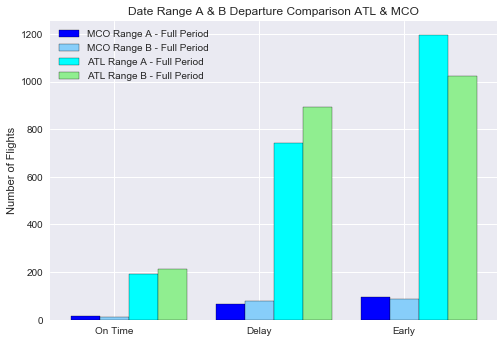

In [52]:
# libraries (values manually inserted)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


palette = sns.color_palette("pastel")

# width of the bars
barWidth = 0.2

# List order on-time, delayed, early 
 
# Height of the Blue bars 
#bars1 = [14, 68, 96] #MCO rangeA 
bars1 = ListMCOA
# Height of the lightskyblue bars
#bars2 = [13, 79, 88] MCO range B
bars2 = ListMCOB
# Height of the cyan bars
#bars3 = [191, 743, 1195]] Atlanta Range A
bars3 = ListATLA
# Height of the lightgreen bars Atlanta Range B
#bars4 = [214, 895, 1023]
bars4 = ListATLB


# Height of of the error bars (bars1)
yer1 = [0, 0.0, 0]
 
# Height of of the error bars (bars2)
yer2 = [0, 0.0, 0]
 
# Height of of the error bars (bars1)
yer3 = [0, 0.0, 0]
 
# Height of of the error bars (bars2)
yer4 = [0, 0.0, 0]

# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Create blue bars MCO Range A 
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=2, label='MCO Range A - Full Period')
 
# Create cyan bars - MCO Range B 
plt.bar(r2, bars2, width = barWidth, color = 'lightskyblue', edgecolor = 'black', yerr=yer2, capsize=2, label='MCO Range B - Full Period')
 
# Create blue bars - ATL  Range A
plt.bar(r3, bars3, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer1, capsize=3, label='ATL Range A - Full Period')
 
# Create cyan bars - ATL Range B
plt.bar(r4, bars4, width = barWidth, color = 'lightgreen', edgecolor = 'black', yerr=yer4, capsize=2, label='ATL Range B - Full Period')
 
# general layout
plt.style.use('seaborn')
plt.title("Date Range A & B Departure Comparison ATL & MCO")
plt.xticks([r + barWidth for r in range(len(bars1))], ['On Time','Delay','Early'])
plt.ylabel('Number of Flights')
plt.legend()
 
# Show graphic
plt.savefig("Date_Range_A_B_NumbersofFligts_Comparison_FULL_MCO_ATL.png")


plt.show()